# Import Library

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Exploratory Data Analysis

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
# The shape of the dataset
df.shape

(891, 12)

In [4]:
# Breif of each Columns  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# All data types structure are correct 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Viewing the Descriptive Statistics of Dataset
df.describe()
# The Minimum Age is 0.42, this might be a problem 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
age_smaller_than_1 = df["Age"].sort_values(ascending=True)
age_smaller_than_1.head(10)
# There is 7 data smaller than 1, this means the age below 1 incidate the person is an infante who just born few months 

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
831    0.83
305    0.92
827    1.00
381    1.00
164    1.00
Name: Age, dtype: float64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'Survived'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Name'),
  Text(4, 0, 'Sex'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'SibSp'),
  Text(7, 0, 'Parch'),
  Text(8, 0, 'Ticket'),
  Text(9, 0, 'Fare'),
  Text(10, 0, 'Cabin'),
  Text(11, 0, 'Embarked')])

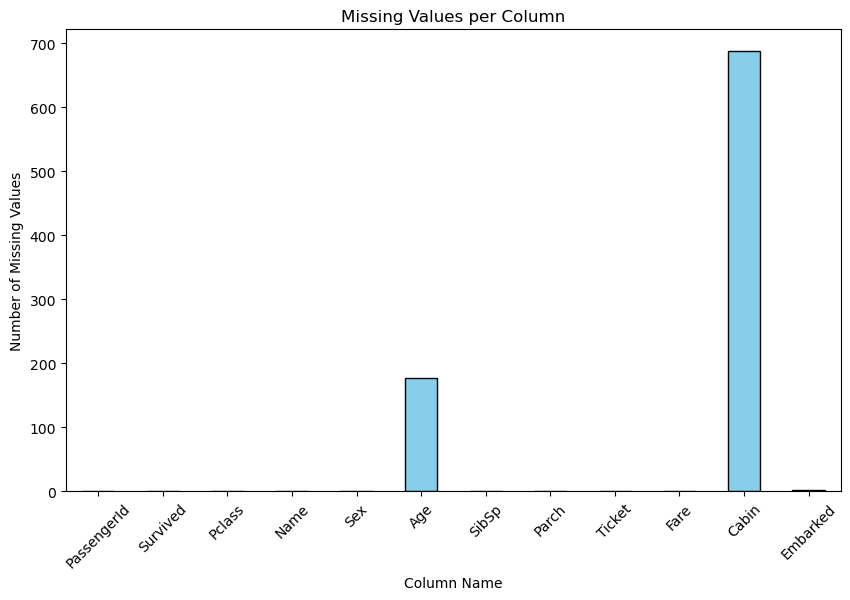

In [9]:

missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6)) 
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)


# Data Cleaning

#Dealing the missing values 

#Converting the categorical data structure to Numerical

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# As the Minimum age is less than 1, and Maximum Age is 80, We will use the Median to dealing the null values
df["Age"] = df["Age"].fillna(df["Age"].median())

# Cabin has a 3/4 missing value, we condider to drop the column
df.drop(columns=["Cabin"], inplace = True)

# Embarked has very few missing value, we using its most high frequency value to replace it 
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Label Encoding for "SEX" column
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [13]:
df.isnull().sum()

# Feature Engineering 

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Extracting Features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df["Survived"]
# Embarked One-Hot Encoding
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)  # drop_first=True避免虚拟变量陷阱

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split


# Splitting Dataset into Train 80%, Test 20% 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Training and Evaluating

In [17]:
# Importing the Library
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF, AdaBoostClassifier as AB
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [18]:
# Creating Models 
models = {
    "LogisticRegression": LR(),
    "SVC": SVC(),
    "RandomForestClassifier": RF(),
    "AdaBoostClassifier": AB(algorithm='SAMME'),
    "XGBClassifier" : xgb.XGBClassifier()
}

# Storing the Accuracy of each models
accuracies = {}

# Training and evaluating each models 
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Storing the accuracies to DataFrame
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

#  We find the RandomForestClassifer has the highest accuracy score
accuracy_df.sort_values("Accuracy", ascending = False).head()

,Model,Accuracy
0,LogisticRegression,0.810056
1,SVC,0.810056
2,RandomForestClassifier,0.810056
4,XGBClassifier,0.804469
3,AdaBoostClassifier,0.798883


# Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV 

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


#  Random Forest Model
rf = RF(random_state=42)

# Using GridSearchCV to finding the best Parameter
grid_search = GridSearchCV(estimator = rf, param_grid= param_grid, cv= 5, n_jobs=-1, scoring= "accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters for RandomForest: {best_params} \n Best accuracy score: {best_score}")

Best Parameters for RandomForest: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 
 Best accuracy score: 0.8314685314685315


In [20]:
best_params_df = pd.DataFrame([best_params])
best_params_df.head()

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,False,10,log2,1,5,200


In [21]:
print(f" Best accuracy score: {best_score}")

 Best accuracy score: 0.8314685314685315


# Evaluating best model

In [22]:
# Fitting the best parameter into the RF model 
best_rf_model = grid_search.best_estimator_

# Predicting the Test set 
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy for RandomForest: {accuracy:.4f}")



Test accuracy for RandomForest: 0.8324


# Predicting the TEST

In [25]:

test_data = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()


test_data.loc[:, 'Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

test_data.loc[:, 'Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data.loc[:, 'Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

test_data_scaled = scaler.transform(test_data)

predictions = best_rf_model.predict(test_data_scaled)

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file generated: submission.csv")


Submission file generated: submission.csv
